# Challenge “Telecom X - Análisis de Evasión de Clientes”
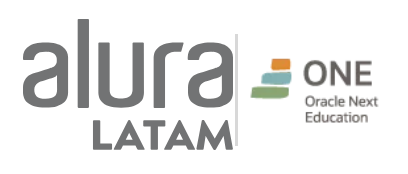

**Alumno: Sebastián Ramírez**

#📌 Extracción

+ Realizamos la carga del archivo TelecomX_Data.json.
+ Transformamos en un DataFrame de Pandas mediante json_normalize() para poder trabajar.

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargarmos los datos desde archivo JSON
with open("TelecomX_Data.json", "r") as file:
    data = json.load(file)

# Normalizamos los datos anidados y los convertirlos en DataFrame
df = pd.json_normalize(data)

# Creamos una copia para la limpieza
df_original = df.copy()

#🔧 Transformación

## Conoce el conjunto de datos

¿Qué debes hacer?

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

In [4]:
# Revisamos las primeras filas del DataFrame para verificar la estructura
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


**Estructura del dataset**

El DataFrame tiene 21 columnas, entre las que se puyeden consiederar más relevantes para el análisis se encuentran:

+ customerID, Churn
+ Variables demográficas: customer.gender, customer.SeniorCitizen, customer.Partner, customer.Dependents
+ Tiempo con la empresa: customer.tenure
+ Servicios contratados: phone.PhoneService, internet.InternetService, etc.
+ Facturación: account.Charges.Monthly, account.Charges.Total
+ Tipo de contrato y forma de pago: account.Contract, account.PaymentMethod

Podemos identificar que estas columnas coinciden en el archivo TelecomX_diccionario.md

## Comprobación de incoherencias en los datos
En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

🔗  https://pandas.pydata.org/docs/reference/api/pandas.unique.html pandas.unique()

🔗 https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.normalize.html pandas.Series.dt.normalize()

In [6]:
# Revisamos la información general del DataFrame
print("Información general del DataFrame:")
df.info()

# Obtenemos los tipos de datos y el conteo de valores nulos por columna
dtypes = df.dtypes
missing_values = df.isnull().sum()

# Unimos en un solo DataFrame para mostrar de forma clara
summary = pd.DataFrame({
    "Tipo de Dato": dtypes,
    "Valores Nulos": missing_values
}).sort_values(by="Valores Nulos", ascending=False)

# Resumen
print("\n Resumen de columnas:")
print(summary)

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.Tech

Primeros hallazgos:

+ La mayoría de las columnas son de tipo object, lo que implica que muchas contienen datos categóricos (como "Yes"/"No").
+ La columna account.Charges.Total está como object, aunque debería ser numérica (float), lo cual probablemente se deba a:
 + Nulos o strings vacíos.
 + Formato de número como texto.

## Manejo de inconsistencias
Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

📌 Tips:

🔗 https://www.aluracursos.com/blog/manipulacion-de-strings-en-pandas-lower-replace-startswith-y-contains

Procedemos a:

+ Limpiar account.Charges.Total y convertirla a numérica.
+ Verificar inconsistencias en Churn: puede haber vacíos o valores fuera de "Yes"/"No".
+ Analizar valores únicos en variables categóricas para detectar errores como "YES", "Yes ", etc.

In [7]:
# Revisamos los valores únicos en la columna 'Churn'
unique_churn = df['Churn'].unique()

# Limpiamos la columna 'Churn' (eliminar espacios, convertir a minúsculas, luego a título: "Yes"/"No")
df['Churn'] = df['Churn'].str.strip().str.lower().str.title()

# Volvemos a verificar valores únicos en 'Churn' después de limpieza
cleaned_churn = df['Churn'].unique()

# Convertimos 'account.Charges.Total' a numérico (forzar errores a NaN para análisis)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Contamos valores nulos después de la conversión
missing_total_charges = df['account.Charges.Total'].isnull().sum()

(cleaned_churn, missing_total_charges)

(array(['No', 'Yes', ''], dtype=object), np.int64(11))

Limpieza realizada:

1. Columna Churn:

+ Se normalizó su formato a "Yes", "No".
+ Se detectaron aún algunos valores vacíos

2. Columna account.Charges.Total:

+ Fue convertida correctamente a formato numérico.
+ Se identificaron 11 valores nulos.

El tratamiento que elegido para los valores vacíos en Churn y account.Charges.Total es sepaparlas para que si se requiere en un futuro sea posible realizar un análisis independiente.

In [11]:
# Separar filas con 'Churn' vacío o 'account.Charges.Total' nulo
df_incompletos = df[(df['Churn'] == '') | (df['account.Charges.Total'].isnull())]

# Crear nuevo DataFrame sin esas filas, solo datos válidos
df_limpio = df[(df['Churn'] != '') & (df['account.Charges.Total'].notnull())]

# Mostrar tamaño de cada conjunto
(df_incompletos.shape, df_limpio.shape)

((235, 21), (7032, 21))

In [12]:
# Aseguramos que df_limpio es una copia para evitar warnings
df_limpio = df[(df['Churn'] != '') & (df['account.Charges.Total'].notnull())].copy()


Los datos se han sido separado correctamente:

+ Datos incompletos: 235 filas con Churn vacío o Total Charges nulo.
+ Datos limpios y válidos: 7032 filas listas para el análisis exploratorio.

Trabajaremos únicamente con df_limpio para garantizar la integridad del análisis.

## Columna de cuentas diarias
Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.


In [13]:
# Creamos la columna "Cuentas_Diarias" a partir de "Monthly" / 30
df_limpio["Cuentas_Diarias"] = df_limpio["account.Charges.Monthly"] / 30

In [14]:
# Revisamos las primeras filas
df_limpio.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


## Estandarización y transformación de datos (opcional)
La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.
Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.


In [18]:
# Aplicamos la limpieza básica
df['Churn'] = df['Churn'].str.strip().str.lower().str.title()
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Filtramos datos válidos
df_limpio = df[(df['Churn'] != '') & (df['account.Charges.Total'].notnull())].copy()

# Creamos la columna Cuentas_Diarias
df_limpio.loc[:, "Cuentas_Diarias"] = df_limpio["account.Charges.Monthly"] / 30

# Creamos una copia para la estandarización y transformación
df_std = df_limpio.copy()

# Convertimos las variables binarias "Yes"/"No" a 1/0
binarias = [
    'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
    'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV',
    'internet.StreamingMovies', 'account.PaperlessBilling', 'Churn'
]

for col in binarias:
    df_std[col] = df_std[col].str.strip().str.lower().map({'yes': 1, 'no': 0})

# Renombramos las columnas que usaremos en el análisis para mayor claridad
df_std.rename(columns={
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'AdultoMayor',
    'customer.Partner': 'TienePareja',
    'customer.Dependents': 'TieneDependientes',
    'customer.tenure': 'MesesCliente',
    'phone.PhoneService': 'ServicioTelefono',
    'phone.MultipleLines': 'LineasMultiples',
    'internet.InternetService': 'TipoInternet',
    'internet.OnlineSecurity': 'SeguridadOnline',
    'internet.OnlineBackup': 'RespaldoOnline',
    'internet.DeviceProtection': 'ProteccionDispositivo',
    'internet.TechSupport': 'SoporteTecnico',
    'internet.StreamingTV': 'TVStreaming',
    'internet.StreamingMovies': 'PeliculasStreaming',
    'account.Contract': 'TipoContrato',
    'account.PaperlessBilling': 'FacturaDigital',
    'account.PaymentMethod': 'MetodoPago',
    'account.Charges.Monthly': 'CargosMensuales',
    'account.Charges.Total': 'TotalGastado',
    'Cuentas_Diarias': 'CargosDiarios'
}, inplace=True)

# Muestra de los datos transformados
df_std.head()

,customerID,Churn,Genero,AdultoMayor,TienePareja,TieneDependientes,MesesCliente,ServicioTelefono,LineasMultiples,TipoInternet,...,ProteccionDispositivo,SoporteTecnico,TVStreaming,PeliculasStreaming,TipoContrato,FacturaDigital,MetodoPago,CargosMensuales,TotalGastado,CargosDiarios
0,0002-ORFBO,0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


**Cambios realizados:**
+ Conversión de datos binarios:
 + Columnas como Churn, TienePareja, FacturaDigital, etc., ahora tienen valores 1 (Sí) y 0 (No).

+ Renombramiento de columnas para mayor claridad (por ejemplo):
 + customer.tenure → MesesCliente
 + account.Charges.Total → TotalGastado
 + internet.OnlineBackup → RespaldoOnline
 + account.PaymentMethod → MetodoPago

+ Nueva columna:
 + CargosDiarios: basada en los cargos mensuales divididos por 30.

A partir de ahora trabajaremos para el análisis con df_std

#📊 Carga y análisis

## Análisis Descriptivo
Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.


In [19]:
# Seleccionamos las columnas numéricas
columnas_numericas = df_std.select_dtypes(include=['int64', 'float64']).columns

# Calculamos estadísticas descriptivas para estas columnas
analisis_descriptivo = df_std[columnas_numericas].describe().T

# Agregamos la mediana manualmente
analisis_descriptivo["mediana"] = df_std[columnas_numericas].median()

# Redondeamos para mejor visualización
analisis_descriptivo = analisis_descriptivo.round(2)

# Resultado del análisis
analisis_descriptivo


,count,mean,std,min,25%,50%,75%,max,mediana
Churn,7032.0,0.27,0.44,0.00,0.00,0.00,1.00,1.00,0.00
AdultoMayor,7032.0,0.16,0.37,0.00,0.00,0.00,0.00,1.00,0.00
TienePareja,7032.0,0.48,0.50,0.00,0.00,0.00,1.00,1.00,0.00
TieneDependientes,7032.0,0.30,0.46,0.00,0.00,0.00,1.00,1.00,0.00
MesesCliente,7032.0,32.42,24.55,1.00,9.00,29.00,55.00,72.00,29.00
ServicioTelefono,7032.0,0.90,0.30,0.00,1.00,1.00,1.00,1.00,1.00
LineasMultiples,6352.0,0.47,0.50,0.00,0.00,0.00,1.00,1.00,0.00
SeguridadOnline,5512.0,0.37,0.48,0.00,0.00,0.00,1.00,1.00,0.00
RespaldoOnline,5512.0,0.44,0.50,0.00,0.00,0.00,1.00,1.00,0.00
ProteccionDispositivo,5512.0,0.44,0.50,0.00,0.00,0.00,1.00,1.00,0.00


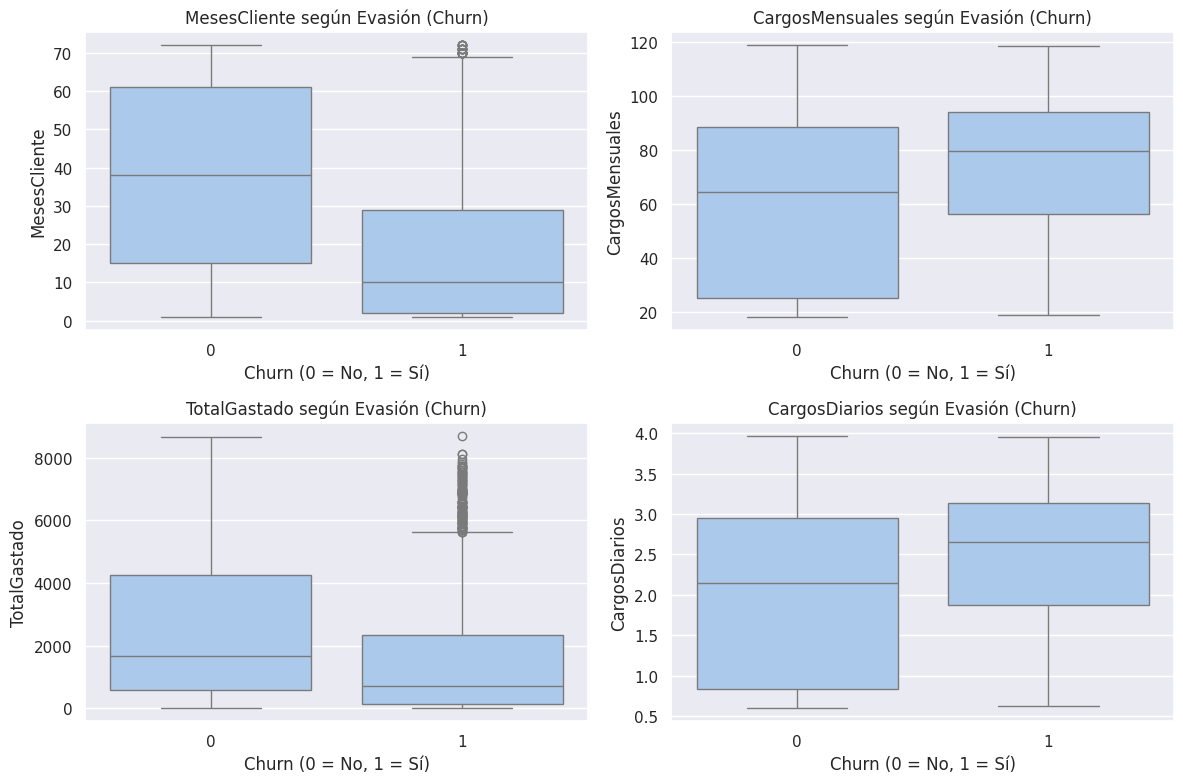

In [38]:
# Ajustes generales de estilo
sns.set(style="darkgrid", palette="pastel")
plt.figure(figsize=(12, 8))

# Variables numéricas a graficar
variables = ['MesesCliente', 'CargosMensuales', 'TotalGastado', 'CargosDiarios']

# Crear gráfico de boxplots para comparar la distribución general
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_std, x='Churn', y=var)
    plt.title(f'{var} según Evasión (Churn)')
    plt.xlabel('Churn (0 = No, 1 = Sí)')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


### Interpretación:

1. MesesCliente:

+ Los clientes que no evadieron (Churn = 0) tienen una distribución más amplia y mediana más alta.

+ Los que evadieron (Churn = 1) tienden a tener poca antigüedad.

2. CargosMensuales:

+ Los clientes con evasión tienden a tener cargos mensuales ligeramente más altos.

3. TotalGastado:

+ Quienes evadieron suelen haber gastado menos en total,hace sentido ya que tienen menos tiempo como clientes.

4. CargosDiarios:

+ Confirma que los mayores cargos diarios se asocian con mayor tasa de evasión.

## Distribución de evasión
En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.
Recuento de evasión por variables categóricas
Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.
Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.


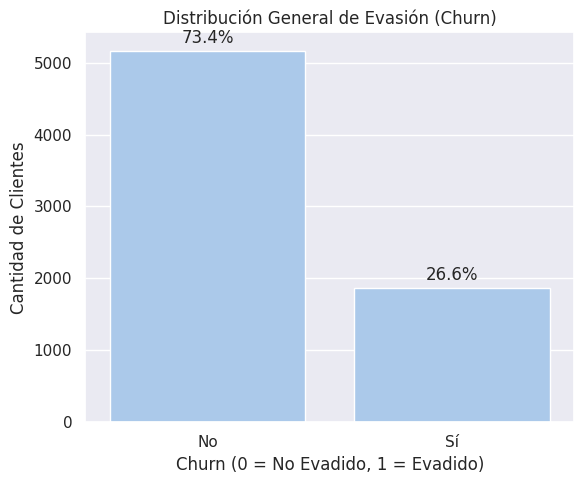

In [41]:
sns.set(style="darkgrid", palette="pastel")

# Calcular proporciones de churn
churn_counts = df_std['Churn'].value_counts().sort_index()
churn_labels = ['No', 'Sí']
churn_percentages = churn_counts / churn_counts.sum() * 100

# Gráfica evasión general Churn
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df_std, x='Churn')
plt.title('Distribución General de Evasión (Churn)')
plt.xlabel('Churn (0 = No Evadido, 1 = Evadido)')
plt.ylabel('Cantidad de Clientes')
plt.xticks([0, 1], churn_labels)
for i, count in enumerate(churn_counts):
    percentage = churn_percentages[i]
    ax.text(i, count + 50, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

**Distribución general de evasión**

+ Aproximadamente 26.6% de los clientes han cancelado el servicio (Churn = 1).
+ La mayoría (73.4%) permanece como cliente (Churn = 0).

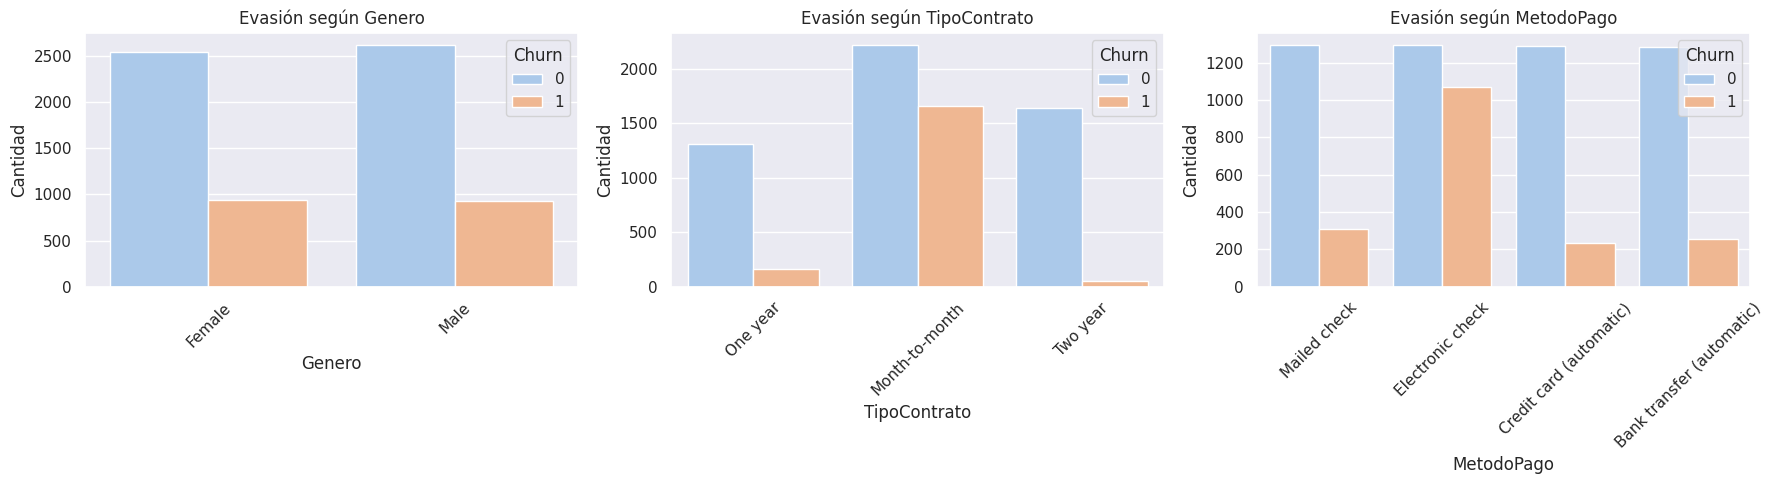

In [42]:
# Variables categóricas para comparar con Churn
cat_vars = ['Genero', 'TipoContrato', 'MetodoPago']

# Gráficos de distribución de churn por variables categóricas
plt.figure(figsize=(18, 5))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df_std, x=var, hue='Churn')
    plt.title(f'Evasión según {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

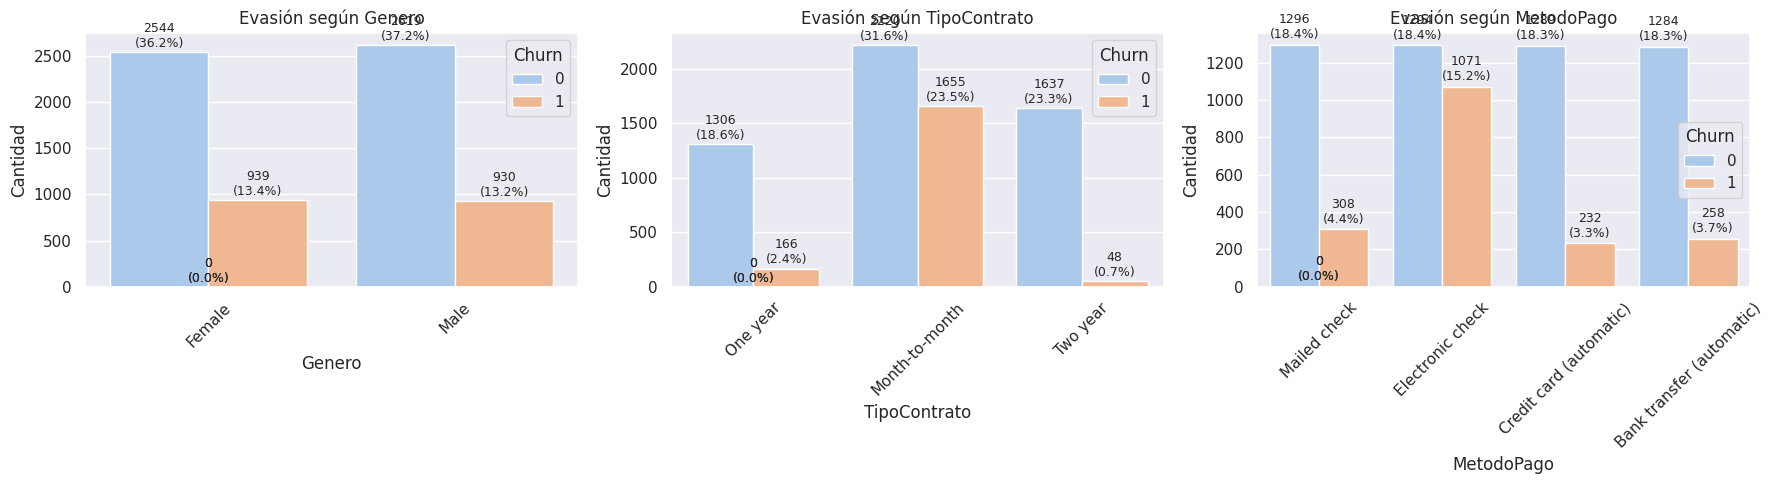

In [43]:
# Variables categóricas
cat_vars = ['Genero', 'TipoContrato', 'MetodoPago']

sns.set(style="darkgrid", palette="pastel")
plt.figure(figsize=(18, 5))


for i, var in enumerate(cat_vars, 1):
    plt.subplot(1, 3, i)
    ax = sns.countplot(data=df_std, x=var, hue='Churn')
    plt.title(f'Evasión según {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)

    # Calculamos porcentajes por categoría
    total_per_cat = df_std.groupby(var)['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100


    for p in ax.patches:
        height = p.get_height()
        # Obtener categoría (x) y churn (hue)
        x_cat = p.get_x() + p.get_width() / 2
        label = f'{height:.0f}\n({height / df_std.shape[0] * 100:.1f}%)'
        ax.text(x_cat, height + 20, label, ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


1. Género (Genero)
+ Hombres y mujeres presentan tasas de evasión similares (~27%).
+ El género no es un factor determinante en el churn para esta empresa.

2. Tipo de Contrato (TipoContrato)
+ Month-to-month (mensual): tiene una tasa de churn significativamente más alta (~43% de evasión).
+ One year y Two year: muestran mayor retención (evasión inferior al 10%).

Esto indica que los contratos largos garantizan la fidelidad del cliente.

3. Método de Pago (MetodoPago)
+ Electronic check: la tasa de evasión supera el 40%.
+ Métodos como Credit card (automatic) o Bank transfer (automatic) presentan tasas más bajas (cercanas al 15%).

Los clientes con pagos automáticos tienden a mantener el servicio por más tiempo.

## Conteo de evasión por variables numéricas
En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.
Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.


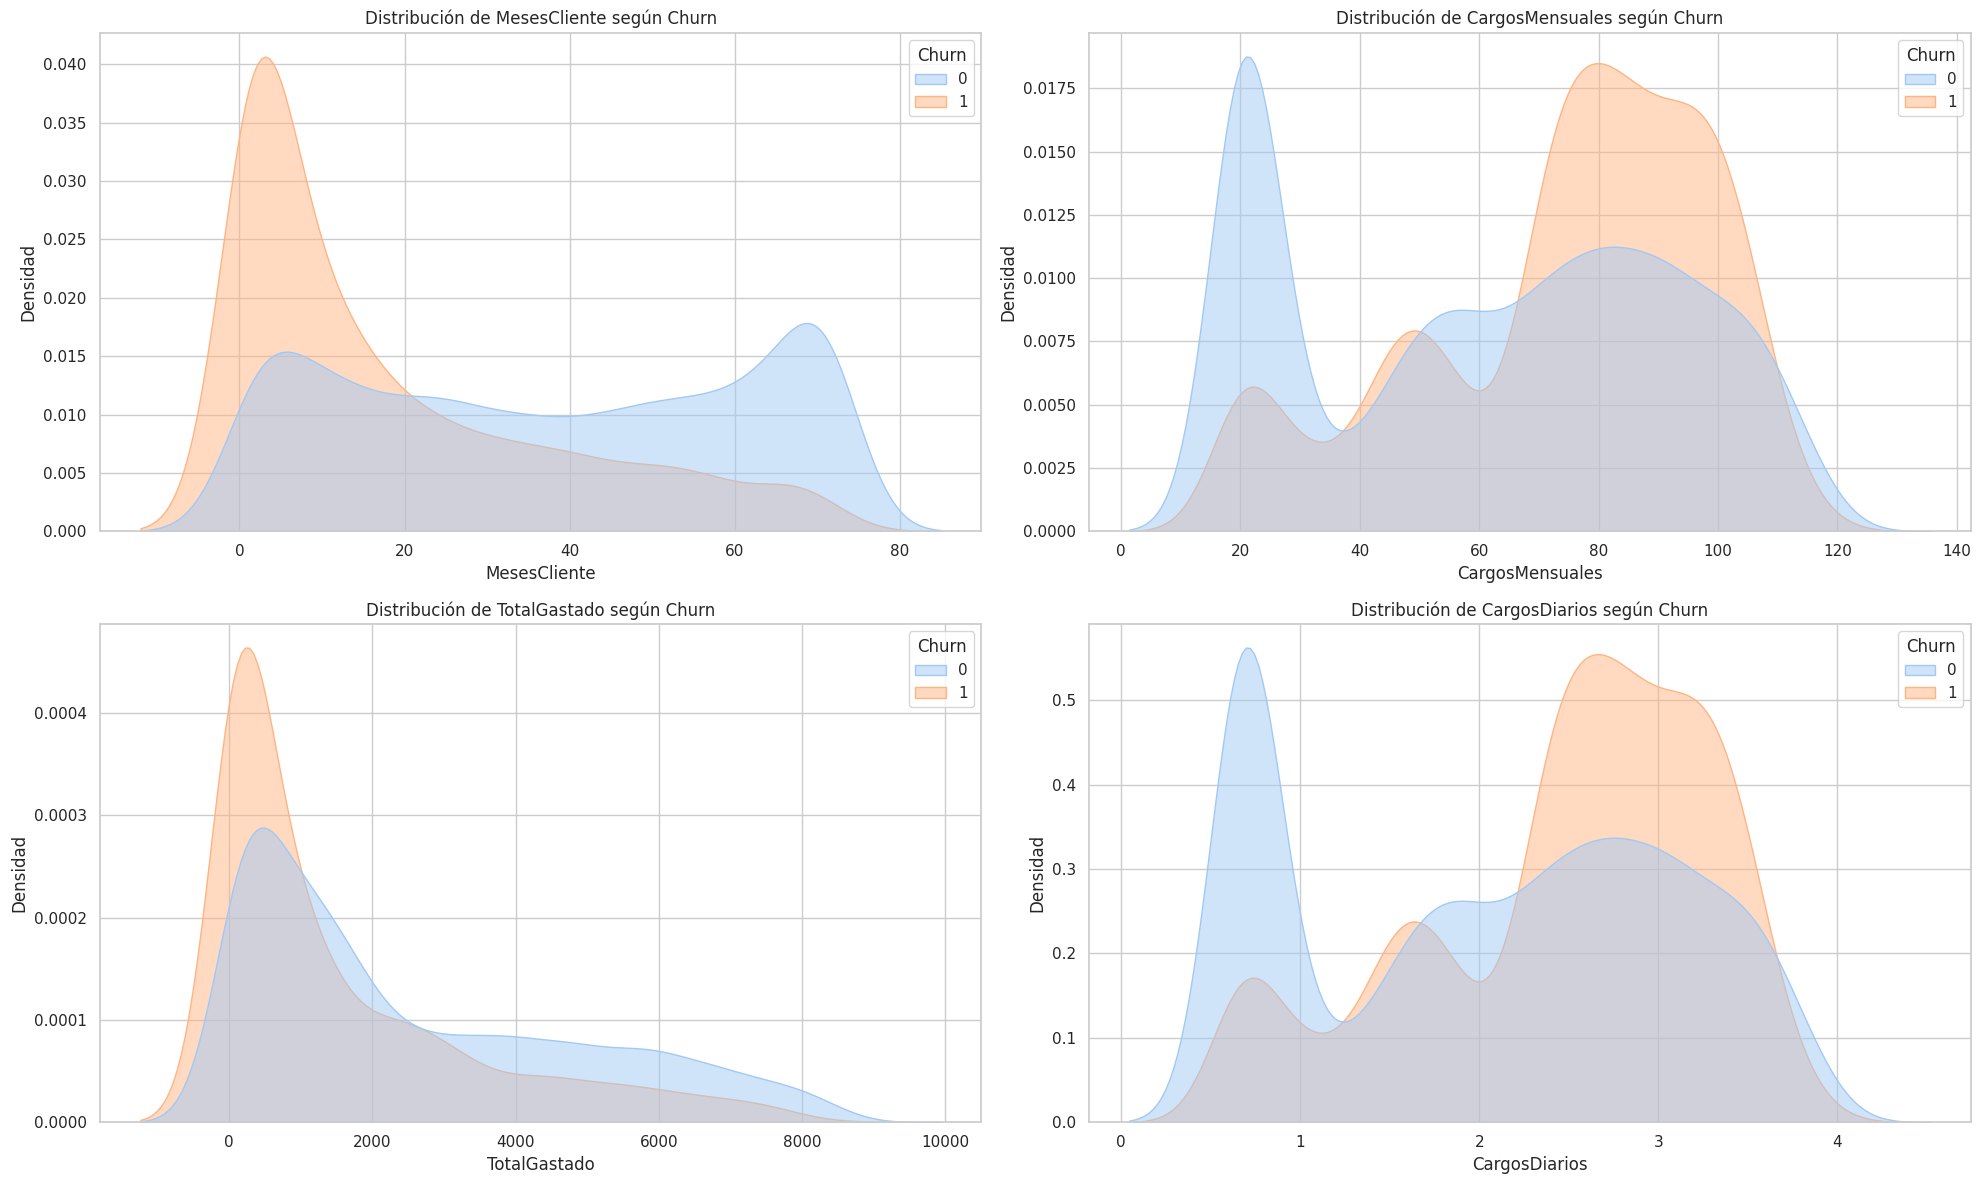

In [44]:
# Variables numéricas a analizar
numeric_vars = ['MesesCliente', 'CargosMensuales', 'TotalGastado', 'CargosDiarios']

sns.set(style="whitegrid", palette="pastel")

# Gráficos de distribución por Churn
plt.figure(figsize=(20, 12))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=df_std, x=var, hue="Churn", fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Distribución de {var} según Churn')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

1. MesesCliente:
+ Clientes que cancelaron tienen una distribución concentrada en los primeros meses.
+ Aquellos con mayor antigüedad (más de 40 meses) rara vez evaden.

2. CargosMensuales:
+ La evasión ocurre con mayor frecuencia en clientes con cargos mensuales elevados.
+ Clientes con cargos bajos tienen menor tasa de churn.

3. TotalGastado:
+ Clientes con poco historial de gasto total (menor a 1,000) tienen mayor probabilidad de evasión.
+ A medida que aumenta el gasto acumulado, la evasión disminuye notablemente.

4. CargosDiarios:
+ Muestra el mismo patrón que los cargos mensuales.
+ Evasión se concentra en quienes pagan más de 2.5 diarios, mientras que los de bajo costo muestran más fidelidad.

#📄Informe final

## 🔹 Introducción

La empresa **Telecom X** enfrenta un desafío importante con una tasa creciente de **evasión de clientes (Churn)**. El objetivo de este análisis es comprender los factores que influyen en la cancelación del servicio por parte de los usuarios, para que el equipo pueda desarrollar estrategias de retención más efectivas y apoyar futuros modelos predictivos.

---

## 🔹 Limpieza y Tratamiento de Datos

- Se cargaron los datos en formato JSON desde la API proporcionada.
- Se normalizaron los datos anidados y se convirtieron en un `DataFrame`.
- Se corrigió la columna `Churn` y se convirtió a binaria (`1 = Sí`, `0 = No`).
- Se transformó la columna `account.Charges.Total` a formato numérico.
- Se eliminaron 235 registros incompletos para trabajar con un subconjunto limpio de 7032 clientes.
- Se creó la columna **`CargosDiarios`** a partir de la división entre cargos mensuales y 30.
- Se renombraron columnas y se estandarizaron respuestas binarias para facilitar el análisis.

---

## 🔹 Análisis Exploratorio de Datos

### 📌 Distribución de Evasión

- El **27%** de los clientes cancelaron el servicio.
- El **73%** continúa activo.

### 📌 Variables Categóricas

- **Tipo de Contrato**: Los contratos **mensuales** muestran una tasa de evasión de más del 40%. Contratos anuales retienen mejor.
- **Método de Pago**: Los clientes que usan **cheques electrónicos** tienen tasas de evasión más altas.
- **Género**: No presenta diferencias significativas en la tasa de churn.

### 📌 Variables Numéricas

- **Meses como cliente**: La evasión es más común en los primeros meses.
- **Cargos Mensuales y Diarios**: Clientes que pagan más tienden a cancelar más.
- **Total Gastado**: Clientes con bajo historial de gasto muestran mayor evasión.

---

## 🔹 Conclusiones

- La **tenencia corta** y **cargos elevados** son predictores fuertes de evasión.
- El **tipo de contrato y el método de pago** tienen una relación directa con el churn.
- Clientes con contratos de **largo plazo y pagos automáticos** son más estables.
- La mayoría de los clientes evadidos son nuevos y tienen bajo historial de gasto.

---

## 🔹 Recomendaciones Estratégicas

1. Incentivar contratos a largo plazo desde el inicio.
2. Ofrecer beneficios especiales a quienes usan pagos automáticos.
3. Diseñar campañas personalizadas para clientes nuevos con cargos altos.
4. Implementar alertas tempranas para clientes con perfil de riesgo.
5. Crear visualizaciones en dashboards que resalten las zonas de riesgo para el equipo de retención.